In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("USvideos_modified.csv", sep=",")
# shows top 10 rows
df.head(10)

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0
5,gHZ1Qz0KiKM,2017-11-20,2017-11-13,19,28,iJustine,1038365,22594,2798,3142,...,True,2 Weeks with iPhone X,ijustine|week with iPhone X|iphone x|apple|iph...,Thanks for watching! Don't forget to subscribe...,7,7,38,122,7,4652602.0
6,39idVpFF7NQ,2017-11-18,2017-11-12,5,24,Saturday Night Live,2688797,19042,3059,2689,...,True,Roy Moore & Jeff Sessions Cold Open - SNL,SNL|Saturday Night Live|SNL Season 43|Episode ...,Embattled Alabama Senate candidate Roy Moore (...,5,6,488,2216,42,5292034.0
7,nc99ccSXST0,2017-11-19,2017-11-12,21,28,CrazyRussianHacker,1251577,28951,1146,2606,...,True,5 Ice Cream Gadgets put to the Test,5 Ice Cream Gadgets|Ice Cream|Cream Sandwich M...,Ice Cream Pint Combination Lock - http://amzn....,6,7,113,180,13,10474796.0
8,jr9QtXwC9vc,2017-11-15,2017-11-13,14,1,20th Century Fox,2671756,12699,505,1010,...,True,The Greatest Showman | Official Trailer 2 [HD]...,Trailer|Hugh Jackman|Michelle Williams|Zac Efr...,"Inspired by the imagination of P.T. Barnum, Th...",2,2,151,458,28,2453494.0
9,TUmyygCMMGA,2017-11-15,2017-11-13,13,25,Vox,635985,20721,2417,4111,...,True,Why the rise of the robots won’t mean the end ...,vox.com|vox|explain|shift change|future of wor...,"For now, at least, we have better things to wo...",2,2,39,170,20,3808198.0


In [2]:
# every variable
list(df.columns)

['video_id',
 'last_trending_date',
 'publish_date',
 'publish_hour',
 'category_id',
 'channel_title',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'tag_appeared_in_title_count',
 'tag_appeared_in_title',
 'title',
 'tags',
 'description',
 'trend_day_count',
 'trend.publish.diff',
 'trend_tag_highest',
 'trend_tag_total',
 'tags_count',
 'subscriber']

In [3]:
# all the unqiue values of a certain col
for col in df:
    print(col)
    print(df[col].unique())


video_id
['2kyS6SvSYSE' '1ZAPwfrtAFY' '5qpjK5DgCt4' ... 'Juad74hE6rs' 'n_S8d_1KVhU'
 'Eouvsy8JdLU']
last_trending_date
['2017-11-20' '2017-11-19' '2017-11-18' '2017-11-15' '2017-11-14'
 '2017-11-16' '2017-11-17' '2017-11-22' '2017-11-21' '2017-11-23'
 '2017-11-24' '2017-11-25' '2017-11-26' '2017-11-28' '2017-11-27'
 '2017-11-29' '2017-11-30' '2017-12-01' '2017-12-02' '2017-12-03'
 '2017-12-06' '2017-12-05' '2017-12-04' '2017-12-07' '2017-12-08'
 '2017-12-09' '2017-12-10' '2017-12-11' '2017-12-12' '2017-12-14'
 '2017-12-13' '2017-12-15' '2017-12-17' '2017-12-16' '2017-12-19'
 '2017-12-18' '2017-12-20' '2017-12-21' '2017-12-22' '2017-12-24'
 '2017-12-25' '2017-12-23' '2017-12-28' '2017-12-27' '2017-12-29'
 '2017-12-26' '2018-01-01' '2017-12-30' '2018-01-02' '2017-12-31'
 '2018-01-03' '2018-01-04' '2018-01-05' '2018-01-06' '2018-01-07'
 '2018-01-08' '2018-01-09' '2018-01-12' '2018-01-14' '2018-01-15'
 '2018-01-13' '2018-01-18' '2018-01-17' '2018-01-16' '2018-01-19'
 '2018-01-22' '2018-01-

In [4]:
df.shape #matrix amount of rows and columns [uncleaned] 

(4547, 23)

In [5]:
df['channel_title'].nunique() # unique channels in this dataset?

1905

In [6]:
df.isna().sum() #no values

video_id                         0
last_trending_date               0
publish_date                     0
publish_hour                     0
category_id                      0
channel_title                    0
views                            0
likes                            0
dislikes                         0
comment_count                    0
comments_disabled                0
ratings_disabled                 0
tag_appeared_in_title_count      0
tag_appeared_in_title            0
title                            0
tags                           208
description                     89
trend_day_count                  0
trend.publish.diff               0
trend_tag_highest                0
trend_tag_total                  0
tags_count                       0
subscriber                      22
dtype: int64

In [7]:
#filling in descriptions that were blank
df.description= df.description.fillna('No description provided')
#df.tags= df.tags.fillna('No tags provided')

In [8]:
df.isna().sum() #double check no missing values

video_id                         0
last_trending_date               0
publish_date                     0
publish_hour                     0
category_id                      0
channel_title                    0
views                            0
likes                            0
dislikes                         0
comment_count                    0
comments_disabled                0
ratings_disabled                 0
tag_appeared_in_title_count      0
tag_appeared_in_title            0
title                            0
tags                           208
description                      0
trend_day_count                  0
trend.publish.diff               0
trend_tag_highest                0
trend_tag_total                  0
tags_count                       0
subscriber                      22
dtype: int64

In [9]:
#no information provided for subscribers to we eliminate those rows
#as to not intefer with our final calculations
df = df.dropna() 

In [10]:
df.isna().sum().sum()
df.shape #change in shape

(4323, 23)

Text(0.5, 1.0, 'Regression plot for views and likes')

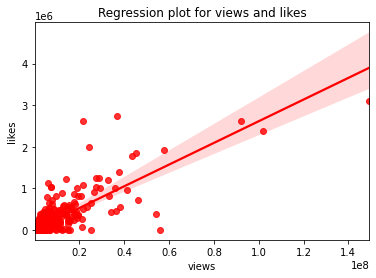

In [11]:
sns.regplot(data=df, x='views', y='likes', color='Red')
plt.title('Regression plot for views and likes')

Text(0.5, 1.0, 'Regression plot for views and dislikes')

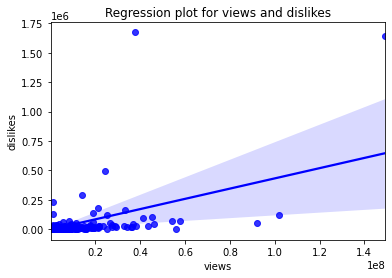

In [12]:
sns.regplot(data=df, x='views', y='dislikes', color= 'blue')
plt.title('Regression plot for views and dislikes')

In [13]:
df_corr= df[['likes', 'dislikes', 'comment_count', 'views']]
df_corr.corr()

,likes,dislikes,comment_count,views
likes,1.000000,0.460969,0.712845,0.825569
dislikes,0.460969,1.000000,0.834074,0.532728
comment_count,0.712845,0.834074,1.000000,0.576639
views,0.825569,0.532728,0.576639,1.000000


<AxesSubplot:>

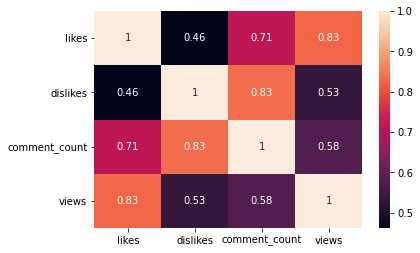

In [14]:
sns.heatmap(df_corr.corr(), annot= True)

# EXAMPLE SENTIMENT ANALYSIS

In [15]:
df.tags.head(10)
tags_complete=''.join(df.tags)

In [16]:
import re
tags= re.sub('[^a-zA-Z]', ' ', tags_complete)

In [17]:
# Display tags
tags

'SHANtell martinlast week tonight trump presidency last week tonight donald trump john oliver trump donald trumpracist superman rudy mancuso king bach racist superman love rudy mancuso poo bear black white official music video iphone x by pineapple lelepons hannahstocking rudymancuso inanna anwar sarkis shots shotsstudios alesso anitta brazil Getting My Driver s License   Lele Ponsrhett and link gmm good mythical morning rhett and link good mythical morning good mythical morning rhett and link mythical morning Season    nickelback lyrics nickelback lyrics real or fake nickelback nickelback songs nickelback song rhett link nickelback gmm nickelback lyrics  website category  nickelback  musical group  rock music lyrics chad kroeger music  industry  mythical gmm challenge comedy funny the betrayal the betrayal act III how you remind meryan higa higatv nigahiga i dare you idy rhpc dares no truth comments comedy funny stupid failijustine week with iPhone X iphone x apple iphone iphone x rev

In [18]:
tags= re.sub(' +', ' ', tags)

In [19]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud= WordCloud(width= 2000, height= 1000, stopwords= set(STOPWORDS)).generate(tags)

In [ ]:
#Visualize
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')